<a href="https://colab.research.google.com/github/sciencebyAJ/OWRD_Training_20240927/blob/main/Example_4_OpenET_JuniperRemovalPairedWS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Evaluating Paired Watersheds

* A set of paired watersheds are used to evaluate forest management impacts on ET rates and potentially water yield.

* This example evaluates the Mays and Jensen Watersheds using OpenET data.

* Juniper pine were removed from the Mays Watershed in 2005-2006.

* This example shows how to use the OpenET API endpoints to extract information about ET rates in the paired watersheds

## Upload geospatial data

*   Make git command to bring in shapefiles for training.
*   Add files to the instance of the collab session by selecting

In [1]:
! git clone https://github.com/sciencebyAJ/OWRD_Training_20240927.git

Cloning into 'OWRD_Training_20240927'...
remote: Enumerating objects: 44, done.
remote: Counting objects: 100% (44/44), done.
remote: Compressing objects: 100% (37/37), done.
remote: Total 44 (delta 13), reused 27 (delta 5), pack-reused 0 (from 0)
Receiving objects: 100% (44/44), 61.19 KiB | 602.00 KiB/s, done.
Resolving deltas: 100% (13/13), done.


In [ ]:
from google.colab import files
uploaded = files.upload()

## Import python libraries for analysis

*   geopandas allows you to read / work with shapefiles
*   pandas supports analysis on tables and time series
*   getpass keeps your API key hiddent
*   requests allows you to interact with the OpenET API
*   matplotlib enables plot customizations

In [12]:

import geopandas as gpd
import pandas as pd
import getpass
import requests
from matplotlib import pyplot as plt


## Read in shapefiles:

1.   Read in Shapefiles for Mays Watershed an Jensen Watershed
2.   Re-project files to WGS 84 projection ('EPSG 4326')
3.   Convert shapefile format to coordinate list for API call

In [3]:
maysws_gdf = gpd.read_file('/content/OWRD_Training_20240927/Shapefiles/maysWS/maysWS.shp')
jensenws_gdf = gpd.read_file('/content/OWRD_Training_20240927/Shapefiles/jensenWS/jensenWS.shp')
maysws_gdf_gee = maysws_gdf.to_crs(epsg=4326)
jensenws_gdf_gee = jensenws_gdf.to_crs(epsg=4326)

Extract a coodinate list from the polygon geometry to make an API

In [30]:
# This is a function to convert the geometry of the shapefile to a list of coordinate pairs
def get_coord_list(gdf):
  '''
  input
  gdf: geodataframe (e.g. shapefile) containing 1 polygon
  returns
  coord_list: list of coordinate pairs defining the polygon
              coordinate pairs allow you to interact easily with
              the OpenET API's polygon endpoint
  '''
  poly_coords = gdf.geometry.get_coordinates()
  poly_coords_list = poly_coords.values.tolist()
  coord_list = [j for i in poly_coords_list for j in i]
  return coord_list

In [29]:
# maysWS_coords is a list of coordinates for the Mays Watershed
maysWS_coords = get_coord_list(maysws_gdf_gee)

# jensensWS_coords is a list of coordinates for the Jensen Watershed
jensensWS_coords = get_coord_list(jensenws_gdf_gee)

### Get your API key from the OpenET API website

Navigate to [OpenET's website](https://account.etdata.org/settings/api) to copy your API key to the clipboard.


In [6]:
YOUR_API_KEY = getpass.getpass('Paste API Key Here --> ')

Paste API Key Here --> ··········


## Make an OpenET API request for time series

* Find API parameter description information here
* Find information on the OpenET timeseries/polygon endpoint here

### Extract OpenET data for the Mays Watershed

In [63]:
# This code assigns the API key you input above prior to making a request
header = {"Authorization": YOUR_API_KEY}

# endpoint arguments
args = {
  "date_range": [
    "1990-01-01", #< This is where you can adjust date range format "YYYY-MM-DD"
    "2023-12-31"
  ],
  "interval": "monthly",
  "geometry": maysWS_coords, #< Note that this is where you can change out geometry
  "model": "ensemble", #<- what model do you want?
  "variable": "ET",#<- what variable do you want? ET, EToF, ETo
  "reference_et": "gridMET",
  "reducer": "mean", #<- do you want mean of ET over watershed or Sum of ET?
  "units": "mm", #<- mm or in
  "file_format": "JSON"
}

# query the api and return to variable 'resp'
resp = requests.post(
    headers=header,
    json=args,
    url="https://oregon.openet-api.org/raster/timeseries/polygon"
)

# Converts the json to a table for analysis
Mays_df = pd.DataFrame.from_dict(resp.json())

Let's pause to look at the table that was returned here

In [ ]:
Mays_df

#### Save the table to your computer.




If you want to save the table as a csv file.
```
Mays_df.to_csv('Mays_WS_ET_2010_2023.csv')
```

If you want to save the table as an Excel sheet.
```
Mays_df.to_excel('Mays_WS_ET_2010_2023.xlxs')
```

If you copy and paste one of these code blocks in the cell below the file will be saved to the 'Files' Tab on the left of the screen. Then you can click on the three dots on right to select download to your local computer for analysis.

**Try it out**: Paste on fo the code sections into the cell below and run the code.

In [55]:
# Paste code here


### Extract OpenET data for the Jensen Watershed

Repeats the same steps for the Jensen Watershed

In [66]:
# endpoint arguments
args = {
  "date_range": [
    "1990-01-01",
    "2023-12-31"
  ],
  "interval": "monthly",
  "geometry": jensensWS_coords,
  "model": "ensemble",
  "variable": "ET",
  "reference_et": "gridMET",
  "reducer": "mean",
  "units": "mm",
  "file_format": "JSON"
}

# query the api
resp = requests.post(
    headers=header,
    json=args,
    url="https://oregon.openet-api.org/raster/timeseries/polygon"
)

Jensen_df = pd.DataFrame.from_dict((resp.json()))

Pause to look at the table for Jensen

In [67]:
Jensen_df

,time,et
0,1990-01-01,15.291
1,1990-02-01,14.021
2,1990-03-01,34.298
3,1990-04-01,47.744
4,1990-05-01,61.395
...,...,...
403,2023-08-01,68.674
404,2023-09-01,49.595
405,2023-10-01,37.720
406,2023-11-01,15.457


If you want to save the table as a csv file.
```
Jensen_df.to_csv('Jensen_WS_ET_2010_2023.csv')
```

If you want to save the table as an Excel sheet.
```
Jensen_df.to_excel('Jensen_WS_ET_2010_2023.xlxs')
```

Paste one of the code blocks into the cell below to save the table.

In [56]:
# Paste code here


### Combine and organize the two tables for analysis

* Rename the columns to track ET from each watershed
* Merge tables on the time column
* Assign the time column as the index of the table

In [151]:
# rename the columns to reflect watershed
Jensen_df.rename(columns={'et':'jensen_et_mm'},inplace=True)
Mays_df.rename(columns={'et':'mays_et_mm'},inplace=True)

# merge tables on the time column values
both_df = pd.merge(Mays_df,Jensen_df,on='time')

# make Python interpret time as a date instead of a string
both_df['time']=pd.to_datetime(both_df['time'])
# set the time as the index of the table
both_df.set_index('time',inplace=True)

Lets pause to see what those steps did

In [ ]:
both_df

## Analyze the data



### Create a plot of monthly mean ET by watershed.

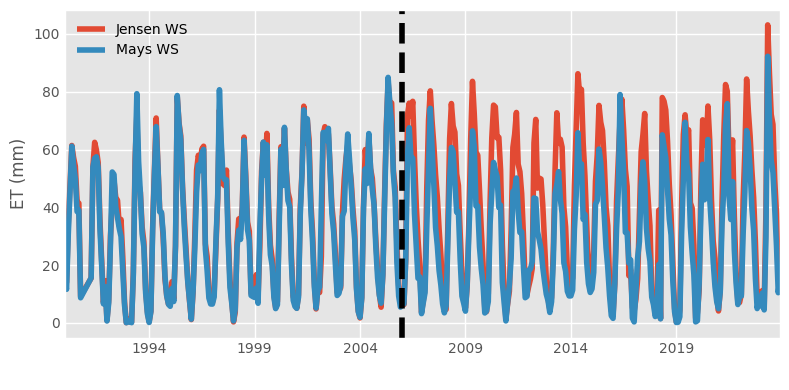

In [154]:
plt.style.use('ggplot')
fig, axs = plt.subplots(1,1, figsize=(8, 4))
axs.set_ylabel('ET (mm)')
both_df.jensen_et_mm.plot(label='Jensen WS',ax=axs)

both_df.mays_et_mm.plot(label='Mays WS',ax=axs)
axs.axvline("2006-01-01", color="black", linestyle="dashed")

axs.legend(frameon=False)
axs.set_xlabel(' ')
fig.tight_layout()
fig.savefig('PairedWatershed_JuniperPineEval.png')

### Quantify impact on ET before / after Juniper Removal

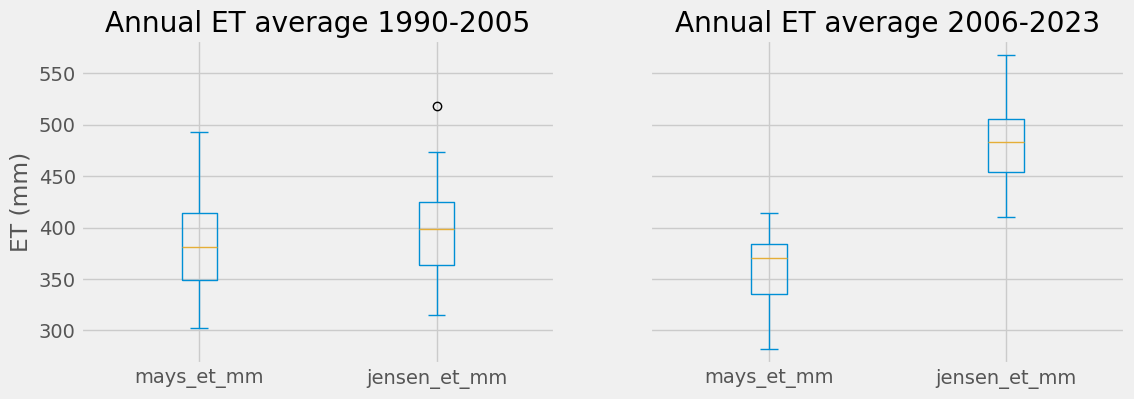

In [155]:
plt.style.use('fivethirtyeight')
fig,axs = plt.subplots(1,2,figsize=(12,4),sharey=True)
ann_dif = both_df.resample('1Y').sum()
ann_dif['1990-01-01':'2005-12-31'][['mays_et_mm', 'jensen_et_mm']].plot(kind='box', ax=axs[0])
axs[0].title.set_text('Annual ET average 1990-2005')
axs[0].set_ylabel('ET (mm)')
ann_dif['2006-01-01':'2023-12-31'][['mays_et_mm', 'jensen_et_mm']].plot(kind='box', ax=axs[1])
axs[1].title.set_text('Annual ET average 2006-2023')
plt.show()

### Quantify Volume Difference

Get area from shapefile
- Covert to EPSG: 32610 UTM Zone 10N map projection. Cartesian coordiantes are in units of meters.
- Extract area from geometry of each feature in units of km$^2$

Convert mm/month to km3 / month
- Convert units from m$^2$ --> km$^2$

In [162]:
m2km = 1000
mm2km = 1000*1000
km3_2_af = 810714

maysws_gdf_AREAm2 = maysws_gdf.to_crs(epsg=32610)
jensenws_gdf_AREAm2 = jensenws_gdf.to_crs(epsg=32610)
#extract area
mayws_km2 =maysws_gdf_AREAm2.geometry.area.values[0]/(m2km*m2km)
jensenws_km2 =jensenws_gdf_AREAm2.geometry.area.values[0]/(m2km*m2km)

ann_dif_tmp = ann_dif.copy()
ann_dif_tmp['mays_et_af'] = km3_2_af*ann_dif_tmp['mays_et_mm']*mayws_km2/mm2km
ann_dif_tmp['jensen_et_af'] = km3_2_af*ann_dif_tmp['jensen_et_mm']*jensenws_km2/mm2km

ann_dif_af=ann_dif_tmp[['mays_et_af', 'jensen_et_af']]

In [163]:
ann_dif_af

,mays_et_af,jensen_et_af
time,,
1990-12-31,311.057862,312.417492
1991-12-31,289.448582,287.410229
1992-12-31,250.450877,247.085722
1993-12-31,266.918842,250.068715
1994-12-31,289.901350,278.445568
1995-12-31,320.966503,312.376715
1996-12-31,305.513534,312.769586
1997-12-31,354.085695,331.325462
1998-12-31,268.119588,268.879447


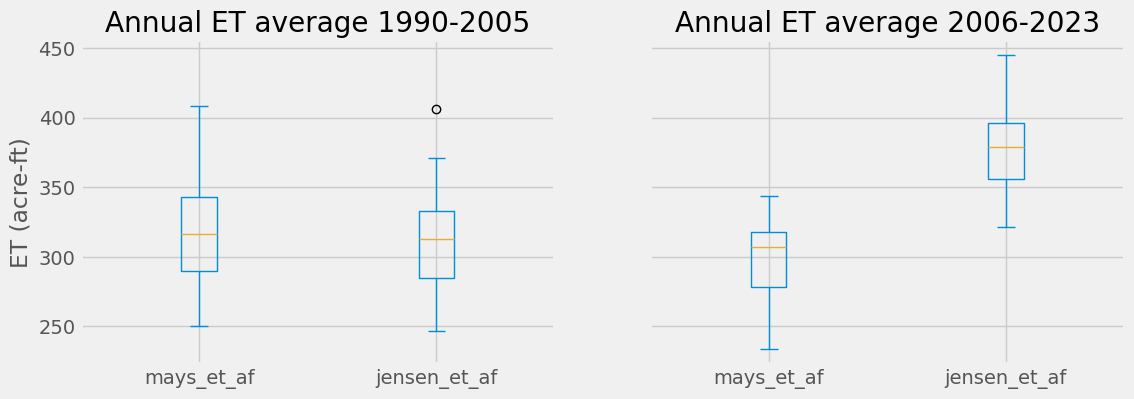

In [165]:
plt.style.use('fivethirtyeight')
fig,axs = plt.subplots(1,2,figsize=(12,4),sharey=True)
ann_dif_af['1990-01-01':'2005-12-31'][['mays_et_af', 'jensen_et_af']].plot(kind='box', ax=axs[0])
axs[0].title.set_text('Annual ET average 1990-2005')
axs[0].set_ylabel('ET (acre-ft)')
ann_dif_af['2006-01-01':'2023-12-31'][['mays_et_af', 'jensen_et_af']].plot(kind='box', ax=axs[1])
axs[1].title.set_text('Annual ET average 2006-2023')
plt.show()

In [169]:
# Import the necessary libraries:
import seaborn as sns
import numpy as np
from scipy import stats

B_MAYS = np.array(ann_dif_af['1990-01-01':'2005-12-31']['mays_et_af'])
B_JENSEN =np.array(ann_dif_af['1990-01-01':'2005-12-31']['jensen_et_af'])

A_MAYS  = np.array(ann_dif_af['2006-01-01':'2023-12-31']['mays_et_af'])
A_JENSEN = np.array(ann_dif_af['2006-01-01':'2023-12-31']['jensen_et_af'])


# Perform the t-test:
At_stat, Ap_value = stats.ttest_ind(A_MAYS, A_JENSEN)
Bt_stat, Bp_value = stats.ttest_ind(B_MAYS, B_JENSEN)

# Interpret the results:
alpha = 0.05

if Bp_value < alpha:
  print("Reject the null hypothesis; there is a significant difference between the mean ET volumes from Mays and Jensen Before Removal.")
else:
  print("Fail to reject the null hypothesis; there is no significant difference between the mean ET volumes from Mays and Jensen Before Removal.")

print('')
if Ap_value < alpha:
  print("Reject the null hypothesis; there is a significant difference between the mean ET volumes from Mays and Jensen Post Removal.")
else:
  print("Fail to reject the null hypothesis; there is no significant difference between the mean ET volumes from Mays and Jensen Post Removal.")




Fail to reject the null hypothesis; there is no significant difference between the mean ET volumes from Mays and Jensen Before Removal.

Reject the null hypothesis; there is a significant difference between the mean ET volumes from Mays and Jensen Post Removal.
